#### Team 1 - Sabri Asmar, Nadine Dhouib, Runjing Diao, Sophia Liu, Srikaran Masabathula, and Aashay Sanghvi
# *Everything We Know About COVID-19 Vaccines* 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Part 1: Introduction

The main idea of this project is COVID-19 vaccines. You will find a brief idea about the daily deaths due to COVID-19, a timeline of when the vaccines were authorized, one of the characteristics of different vaccines, how vaccines were administered and distrubuted in the U.S., percentage of people vaccinated in different states, the market share of different COVID-19 vaccine providers in U.S., the market share of different COVID-19 vaccine providers in other countries or regions, racial vaccination ratios in different states in the U.S., vaccinations administered by quarter across different continents and countries, and finally the efficacy of the vaccine.

## Data sources

https://github.com/owid/covid-19-data 

https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/d6p8-wqjm

The data for the visuals below have been obtained from the links above. The datasets contains information on COVID-19 like total number of cases, deaths country wise and continent wise, vaccinated age-groups, un-vaccinated age-groups, etc. as of February 18th, 2022.

### Worldwide trend in new Covid-19 cases

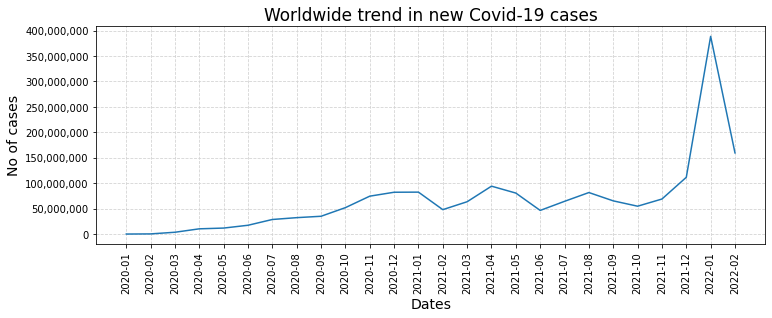

In [2]:
x=pd.read_csv('owid-covid-data.csv')
x1=x.groupby(["date"],as_index=False)["new_cases"].sum()
x1['date'] = pd.to_datetime(x1['date'], errors='coerce')
x1['month_year'] = x1['date'].dt.strftime('%Y-%m')
x1=x1.groupby(["month_year"],as_index=False)["new_cases"].sum()

fig, ax = plt.subplots()
ax.set_title('Worldwide trend in new Covid-19 cases', fontsize=17)
ax.plot(x1["month_year"], x1["new_cases"])
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('No of cases', fontsize=14)
plt.xticks(rotation=90)
ax.grid(color='lightgray', linestyle='dashed')

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])

We observe an increasing trend in new Covid cases worldwide, and a sharp increase in Dec 2021. The number of new Covid cases peaked in Jan 2022 at nearly 400,000,000 cases a day and after that declined sharply.

### Worldwide trend in daily Covid-19 deaths

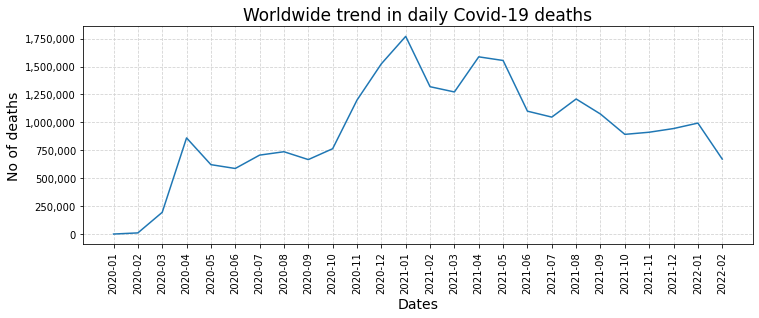

In [3]:
x2=x.groupby(["date"],as_index=False)["new_deaths"].sum()
x2['date'] = pd.to_datetime(x2['date'], errors='coerce')
x2['month_year'] = x2['date'].dt.strftime('%Y-%m')
x2=x2.groupby(["month_year"],as_index=False)["new_deaths"].sum()

fig, ax = plt.subplots()
ax.set_title('Worldwide trend in daily Covid-19 deaths', fontsize=17)
ax.plot(x2["month_year"], x2["new_deaths"])
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('No of deaths', fontsize=14)
ax.grid(color='lightgray', linestyle='dashed')
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])

Highest number of deaths in a day due to Covid was observed in Jan 2021 at about 1,760,000. After that, the number of deaths started declining. The reason could be because more people started getting access to vaccines.

### USA trend in new Covid-19 cases

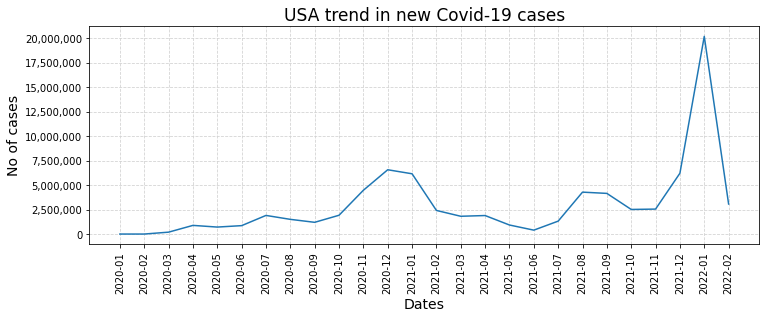

In [4]:
df=pd.read_csv('owid-covid-data.csv')
df.head()
df = df.loc[df['location']== "United States"]
df_1=df.groupby(["date"],as_index=False)["new_cases"].sum()
df_1['date'] = pd.to_datetime(df_1['date'], errors='coerce')
df_1['month_year'] = df_1['date'].dt.strftime('%Y-%m')
df_1=df_1.groupby(["month_year"],as_index=False)["new_cases"].sum()

fig, ax = plt.subplots()
ax.set_title('USA trend in new Covid-19 cases', fontsize=17)
ax.plot(df_1["month_year"], df_1["new_cases"])
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('No of cases', fontsize=14)
plt.xticks(rotation=90)
ax.grid(color='lightgray', linestyle='dashed')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])

We observe an increasing trend in new covid cases in the US, and a sharp increase in Dec 2021. The number of new Covid cases peaked in Jan 2022 at nearly 20,000,000 cases a day and after that declined sharply.

### USA trend in daily Covid-19 deaths

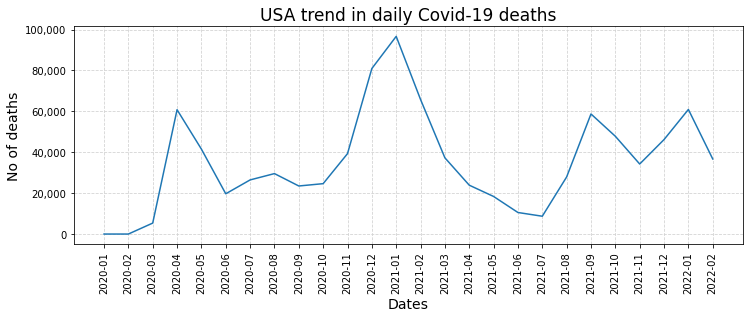

In [5]:
df_2=df.groupby(["date"],as_index=False)["new_deaths"].sum()
df_2['date'] = pd.to_datetime(df_2['date'], errors='coerce')
df_2['month_year'] = df_2['date'].dt.strftime('%Y-%m')
df_2=df_2.groupby(["month_year"],as_index=False)["new_deaths"].sum()

fig, ax = plt.subplots()
ax.set_title('USA trend in daily Covid-19 deaths', fontsize=17)
ax.plot(df_2["month_year"], df_2["new_deaths"])
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('No of deaths', fontsize=14)
plt.xticks(rotation=90)
ax.grid(color='lightgray', linestyle='dashed')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])

In the US, the highest number of deaths in a day due to Covid was observed in Jan 2021 at about 97,000. After that the number of deaths started declining. The reason could be because more people started getting access to vaccines.

# Part 2: Vaccine history and details

## Data source
https://en.wikipedia.org/wiki/COVID-19_vaccine

This is a Wikipedia article that provided information about the vaccines presented in the following visual.

### Covid Vaccine Timeline

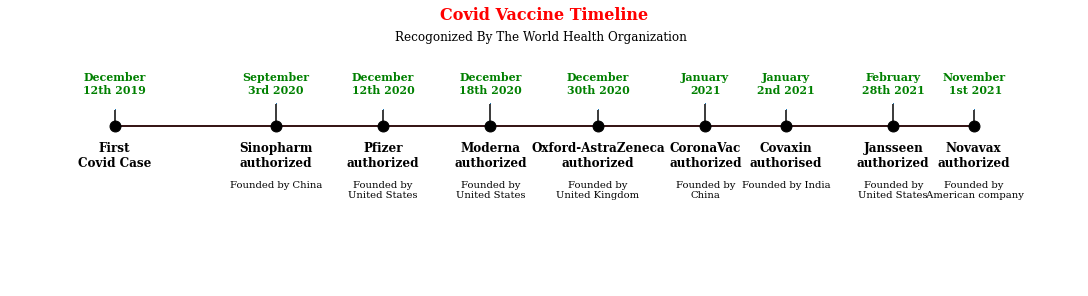

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## these go on the numbers below
tl_dates = [
    "First\nCovid Case",
    "Sinopharm\nauthorized",
    "Pfizer\nauthorized",
    "Moderna\nauthorized",
    "Oxford-AstraZeneca\nauthorized",
    "CoronaVac\nauthorized",
    "Covaxin\nauthorised",
    "Jansseen\nauthorized",
    "Novavax\nauthorized" ]

tl_x = [1,2.5,3.5,4.5, 5.5,6.5,7.25,8.25,9]
# these go on the numbers
tl_sub_x = [1,2.5,3.5,4.5, 5.5, 6.5, 7.25,8.25,9]

tl_sub_times = ["December\n12th 2019","September\n3rd 2020","December\n12th 2020","December\n18th 2020","December\n30th 2020","January\n2021","January\n2nd 2021","February\n28th 2021",'November\n 1st 2021']

tl_text = [ " ","Founded by China","Founded by\nUnited States","Founded by\nUnited States","Founded by\nUnited Kingdom", "Founded by\nChina", 'Founded by India' ,"Founded by\nUnited States", "Founded by\n American company"]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-3, 1.85)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, color='black', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)),c='black' ,s=120, zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), c='black',s=25,  zorder=3)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.75, date, ha='center', 
            fontfamily='serif', fontweight='bold', color='black',fontsize=12)

levels = np.zeros(len(tl_x))    
levels[::2] = 0.3
levels[1::2] = 0.4
markerline, stemline, baseline = ax.stem(tl_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',')
plt.setp(stemline, color = 'black' )

# Text
for index, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1, time, va= 'top',ha='center', fontfamily='serif', fontweight='bold',
  color='green' , fontsize=11)
    
    ax.text(x, -1, txt, va='top', ha='center',fontfamily='serif')

    # Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Covid Vaccine Timeline", fontweight="bold", fontfamily='serif', fontsize=16, color='r')
ax.text(3.61,1.57,"Recogonized By The World Health Organization", fontfamily='serif', fontsize=12, color='black')

plt.show()

This visual represents a timeline of when each vaccine was first authorized for emergency use and what was the nationality of the company that provided it. This timeline represents only the vaccines that are recognized by WHO. 

## Data sources
For Pfizer: https://www.the-sun.com/news/3049901/how-much-does-pfizer-covid-vaccine-cost/

For Moderna, Astrazeneca, Novavax: https://www.theguardian.com/world/2021/aug/11/covid-19-vaccines-the-contracts-prices-and-profits

For Janseen: https://www.drugs.com/price-guide/janssen-covid-19-vaccine

For Sinopharm: https://www.bmj.com/content/373/bmj.n912 

The above sources are different articles that provided an estimate cost of vaccines presented in the following visual.

### How much does a dose of each vaccine cost?

<ipython-input-7-db3260c61e9c>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax0 = fig.add_subplot(gs[0, 0])


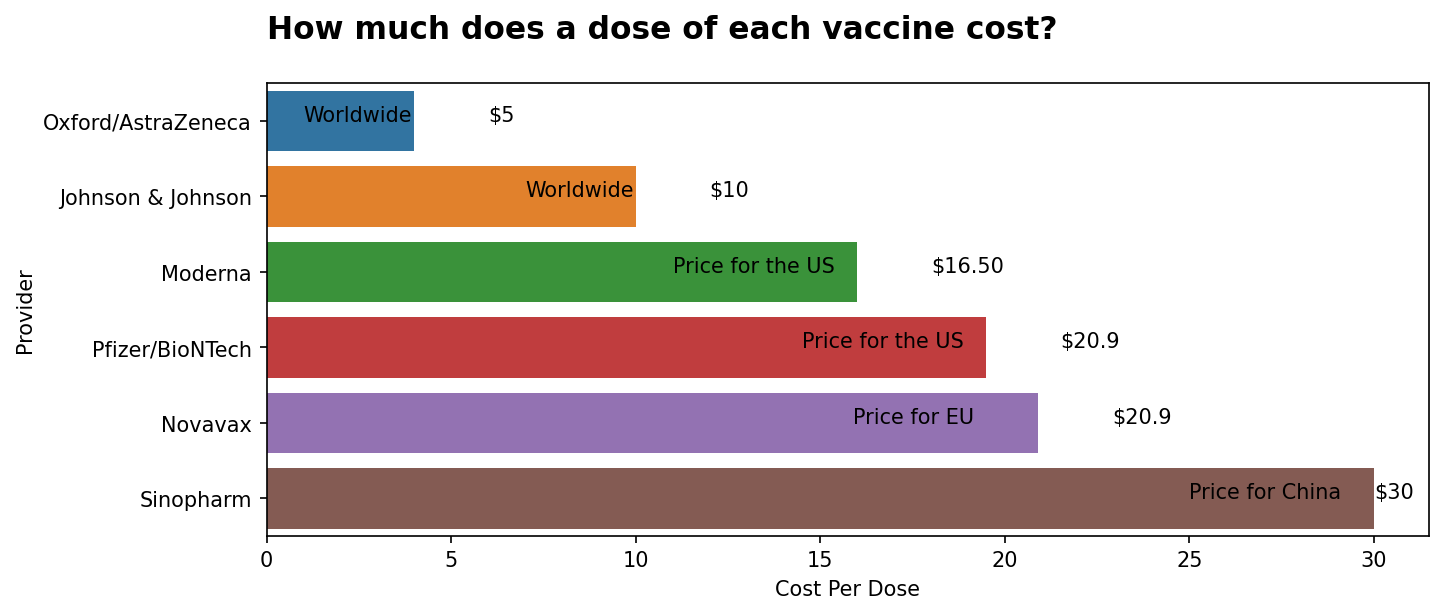

In [7]:
import seaborn as sns
cost_vac = pd.DataFrame(columns=['Cost Per Dose'],
                      data = [4,10, 16 ,19.5,20.9,30])
cost_vac['Provider'] ='Oxford/AstraZeneca','Johnson & Johnson','Moderna','Pfizer/BioNTech','Novavax','Sinopharm'
cost_vac['Cost Per Dose']
fig = plt.figure(figsize=(10, 4),dpi=150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)
ax = fig.add_subplot(gs[0, 0])
ax0 = fig.add_subplot(gs[0, 0])

ax0.text(0, -1, 'How much does a dose of each vaccine cost?', color='black', fontsize=15, ha='left', va='bottom', weight='bold')

sns.barplot(ax=ax0, y=cost_vac['Provider'], x=cost_vac['Cost Per Dose'])

#sns.barplot(ax=ax0, y=cost_vac['Provider'], x=[0,45])

for i in range(0,1):
   ax0.annotate('$5', xy=(cost_vac['Cost Per Dose'][i]+2,i))
   ax0.annotate('Worldwide',xy=(cost_vac['Cost Per Dose'][i]-3,i))
for i in range(1,2):
    ax0.annotate('$10', xy=(cost_vac['Cost Per Dose'][i]+2,i))
    ax0.annotate('Worldwide',xy=(cost_vac['Cost Per Dose'][i]-3,i))
for i in range(2,3):
    ax0.annotate('$16.50', xy=(cost_vac['Cost Per Dose'][i]+2,i))
    ax0.annotate('Price for the US',xy=(cost_vac['Cost Per Dose'][i]-5,i))

for i in range(3,4):
    ax0.annotate('$20.9', xy=(cost_vac['Cost Per Dose'][i]+2,i))
    ax0.annotate('Price for the US',xy=(cost_vac['Cost Per Dose'][i]-5,i))
for i in range(4,5):
    ax0.annotate('$20.9', xy=(cost_vac['Cost Per Dose'][i]+2,i))
    ax0.annotate('Price for EU',xy=(cost_vac['Cost Per Dose'][i]-5,i))
for i in range(5,6):
    ax0.annotate('$30', xy=(cost_vac['Cost Per Dose'][i],i))
    ax0.annotate('Price for China',xy=(cost_vac['Cost Per Dose'][i]-5,i))

This visual represents the cost of different vaccines in different countries.

# Part 3: Manufacturers & Administration

## Data source
https://covid.cdc.gov/covid-data-tracker/#vaccinations_vacc-total-admin-rate-total

The next set of visuals have been created using a dataset obtained from CDC’s COVID Data Tracker webpage. The dataset used consists of information about COVID-19 vaccine distribution and administration in the United States as of February 18th, 2022.

### Vaccines distributed and administered in the U.S.

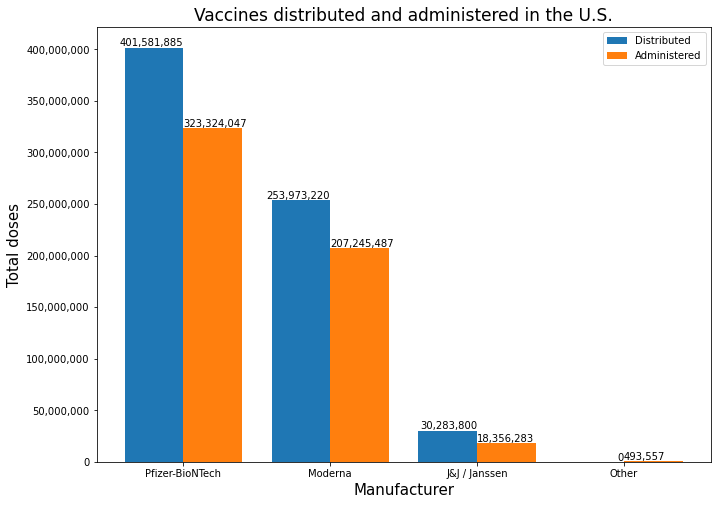

In [8]:
doses = pd.read_csv('covid19_vaccinations_in_the_united_states.csv', index_col=0)

# Functions for adding value labels
def addLeftLabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1500000, f"{y[i]:,}", ha = 'right')
        
def addRightLabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1500000, f"{y[i]:,}", ha = 'left')
        
fig, ax = plt.subplots()

if __name__ == '__main__':
    x = ["Pfizer-BioNTech", "Moderna", "J&J / Janssen", "Other"]
    y = [int(doses.iloc[0]['Total Number of Pfizer doses delivered']), int(doses.iloc[0]['Total Number of Moderna doses delivered']), int(doses.iloc[0]['Total Number of Janssen doses delivered']), int(doses.iloc[0]['Total Number of doses from Other manufacturer delivered'])]
    z = [int(doses.iloc[0]['Total Number of Pfizer doses adminstered']), int(doses.iloc[0]['Total Number of Moderna doses administered']), int(doses.iloc[0]['Total Number of Janssen doses administered']), int(doses.iloc[0]['Total Number of doses from Other manufacturer administered'])]
    
    # Creating double bar graph
    x_axis = np.arange(len(x))
    plt.xticks(x_axis, x)
    ax.bar(x_axis - 0.2, y, 0.4, label = 'Distributed')
    ax.bar(x_axis + 0.2, z, 0.4, label = 'Administered')  
  
    # Labels & Formatting
    addLeftLabels(x, y)
    addRightLabels(x, z)
    ax.set_title("Vaccines distributed and administered in the U.S.", fontsize=17)
    ax.set_xlabel("Manufacturer", fontsize=15)
    ax.set_ylabel("Total doses", fontsize=15)
    
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))) # y-axis thousands separator
    fig.set_size_inches([11, 8])
    
    plt.legend()

plt.show()

Despite being more convenient to distribute and administer, Johnson and Johnson's (J&J's) total doses distributed and administered are substantially lower than Pfizer and Moderna's. This could be due to the fact that Pfizer and Moderna require two doses, but J&J only requires one. It could also possibly be linked to concerns about J&J's vaccines causing rare blood clots.

### Vaccination status in the U.S.

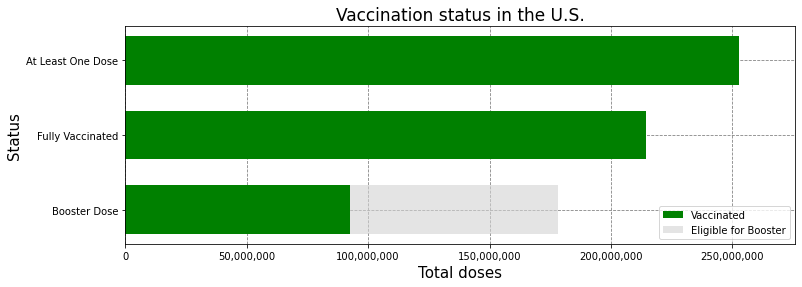

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

status = ['Booster Dose', 'Fully Vaccinated', 'At Least One Dose']
vaccinated = [int(doses.iloc[0]['People who have received a booster dose']), int(doses.iloc[0]['People Fully Vaccinated by State of Residence']), int(doses.iloc[0]['People with at least One Dose by State of Residence'])]
eligible = [85466708, 0, 0] # 85,466,708 is directly from source URL as of 2/18/2022
space = [0, 0, 10000000] # Adding some space on right side of "At Least One Dose" bar

# Plotting
ax.barh(status, vaccinated, align='center', height=.65, color='green', label='Vaccinated')
ax.barh(status, eligible, align='center', height=.65, left=vaccinated, color='lightgray', label='Eligible for Booster', alpha=0.6)
ax.barh(status, space, align='center', height=.65, left=vaccinated, alpha=0)

# Grid
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

# Labels & Formatting
ax.set_yticks(status)
ax.set_title('Vaccination status in the U.S.', fontsize=17)
ax.set_xlabel('Total doses', fontsize=15)
ax.set_ylabel('Status', fontsize=15)

ax.ticklabel_format(useOffset=False, style='plain', axis='x') # Remove default scientific notation
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])

ax.legend()

plt.show()

The gap between those fully vaccinated and those fully vaccinated with a booster dose is substantially bigger than the gap between those who have had at least one dose and those who have been fully vaccinated. People may have skipped another dose for a variety of reasons, such as to avoid the side effects of the second or booster dose, or because scheduling an appointment was difficult.

### States and territories with highest % of residents vaccinated

Text(0.5, 1.0, 'States and territories with highest % of residents vaccinated')

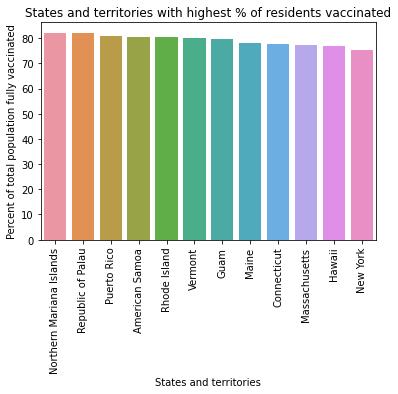

In [10]:
doses1 = pd.read_csv('covid19_vaccinations_in_the_united_states (1).csv')

doses1_max = doses1[doses1["Percent_of_Total_Pop_Fully_Vaccinated"] > 75.0]
doses1_max.sort_values(by="Percent_of_Total_Pop_Fully_Vaccinated", ascending=False)

sns.barplot(x= "State", y="Percent_of_Total_Pop_Fully_Vaccinated", data=doses1_max, order= doses1_max.sort_values('Percent_of_Total_Pop_Fully_Vaccinated', ascending=False).State)
plt.xticks(rotation=90)
plt.xlabel('States and territories')
plt.ylabel('Percent of total population fully vaccinated')
plt.title("States and territories with highest % of residents vaccinated")

# plt.figure(figsize=(15,8))

States and territories in the US with HIGHEST percentage of residents vaccinated are Northern Mariana Islands and Republic of Palau, followed by Puerto Rico. New York ranks number 12.

### States and territories with lowest % of residents vaccinated

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Marshall Islands'),
  Text(1, 0, 'Indian Health Svc'),
  Text(2, 0, 'Federated States of Micronesia'),
  Text(3, 0, 'Alabama'),
  Text(4, 0, 'Wyoming'),
  Text(5, 0, 'Mississippi'),
  Text(6, 0, 'Louisiana'),
  Text(7, 0, 'Virgin Islands'),
  Text(8, 0, 'Idaho')])

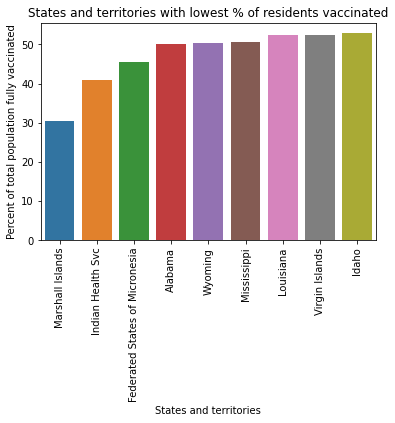

In [11]:
doses1_min = doses1[doses1["Percent_of_Total_Pop_Fully_Vaccinated"] < 53.0]
doses1_min.sort_values(by="Percent_of_Total_Pop_Fully_Vaccinated", ascending=True, inplace=False)

sns.barplot(x= "State", y="Percent_of_Total_Pop_Fully_Vaccinated", data=doses1_min, order= doses1_min.sort_values('Percent_of_Total_Pop_Fully_Vaccinated').State)
plt.title("States and territories with lowest % of residents vaccinated")
plt.xlabel('States and territories')
plt.ylabel('Percent of total population fully vaccinated')
plt.xticks(rotation=90)

States and territories in the US with LOWEST percentage of residents vaccinated are Marshall Island and Indian Health Svc, followed by Federated States of Micronesia.

## Data sources
https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc 

https://www.kaggle.com/gpreda/covid-world-vaccination-progress?select=country_vaccinations_by_manufacturer.csv

The data used for analysis in this part mainly comes from two datasets, which correspondingly cover the two parts in this analysis. The first dataset is from CDC's website. This dataset presents information of the number of different brand of COVID-19 vaccine adminisitered in US as well as in different states from December 2020 to Febuary 2022. 

The other dataset is from Kaggle.com. It presents information of the number of different brand of COVID-19 vaccine administered in many other countries or regions around the world in 2021.

This analysis focuses on the market share of different brand of COVID-19 vaccine and aims to find out the most popular manufacture in the world.

### The market share of different COVID-19 vaccine provider in eight states

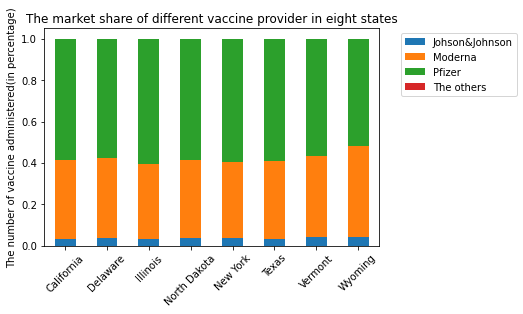

In [12]:
covid=pd.read_csv('America_COVID-19_vaccine_by_states.csv',low_memory=False)

covid_date=covid.loc[covid['Date']=='12/31/2021']

covid_states=pd.DataFrame(covid_date,columns=['Location','Administered'])
covid_states.sort_values(by='Administered',ascending=False)

states_manu=covid_date.loc[(covid_date['Location']=='TX')|(covid_date['Location']=='CA')|(covid_date['Location']=='IL')|(covid_date['Location']=='NY')|(covid_date['Location']=='VT')|(covid_date['Location']=='ND')|(covid_date['Location']=='DE')|(covid_date['Location']=='WY')]

states_manu=pd.DataFrame(states_manu,columns=['Location','Administered_Janssen', 'Administered_Moderna','Administered_Pfizer','Administered_Unk_Manuf'])

states_manu=states_manu.groupby(by=['Location']).sum()

manu_sec=states_manu.div(states_manu.sum(axis=1),axis=0)

manu_sec.plot.bar(stacked=True)
plt.xlabel(None)
plt.ylabel('The number of vaccine administered(in percentage)')
plt.title('The market share of different vaccine provider in eight states')
plt.legend(loc=2,bbox_to_anchor=(1.05,1),borderaxespad=0.5,labels=['Johson&Johnson','Moderna','Pfizer','The others'])

states_name=['California','Delaware','Illinois','North Dakota','New York','Texas','Vermont','Wyoming']
plt.xticks(ticks=range(8),labels=states_name,rotation=45)

plt.show()

Pfizer is the most popular vaccine in almost every states in US. The market shares of different manufactures are nearly the same throughout the states.

### The market share of different COVID-19 vaccine provider in other countries or regions

#### The number of vaccine administered in EU (by provider)

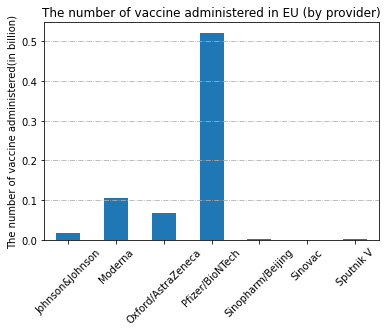

In [34]:
country=pd.read_csv('country_vaccinations_by_manufacturer.csv',low_memory=False)

country_date=country.loc[country['date']=='2021-12-31']

country_date.groupby(by='location').sum().sort_values(by='total_vaccinations',ascending=False)

covid_eu=country_date.loc[country['location']=='European Union']

covid_eu.plot.bar(x='vaccine',legend=False)
plt.xlabel(None)

def update_yaxis_value2(temp,position):
    result=temp/1000000000
    return result

plt.gca().yaxis.set_major_formatter(FuncFormatter(update_yaxis_value2))

plt.ylabel('The number of vaccine administered(in billion)')
plt.title('The number of vaccine administered in EU (by provider)')
plt.grid(axis='y',linestyle='-.')
plt.xticks(rotation=45)

#plt.figure().set_size_inches(10,10)

plt.show()

In EU, Pfizer is the most administered vaccine brand, too.

#### The number of vaccine administered in some countries or regions

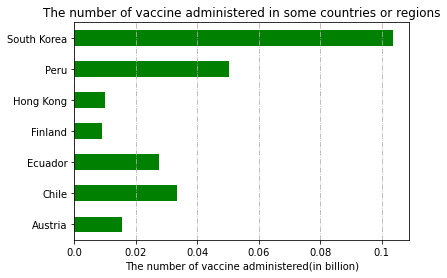

In [35]:
covid_other=country_date.loc[(country_date['location']=='Peru')|(country_date['location']=='Chile')|(country_date['location']=='Hong Kong')|(country_date['location']=='South Korea')|(country_date['location']=='Austria')|(country_date['location']=='Finland')|(country_date['location']=='Ecuador')]

covid_com=covid_other.groupby(by='location').sum()

covid_com.plot.barh(color='g',legend=False)

plt.ylabel(None)

def update_xaxis_value2(temp,position):
    result=temp/1000000000
    return result

plt.gca().xaxis.set_major_formatter(FuncFormatter(update_xaxis_value2))

plt.xlabel('The number of vaccine administered(in billion)')
plt.title('The number of vaccine administered in some countries or regions')
plt.grid(axis='x',linestyle='-.')

plt.show()

Seven countries or regions are selected to find out the market share of different vaccine provider around the world. The total administered vaccine number of these countries or regions vary remarkably.

#### The market share of different vaccine provider in some countries or regions

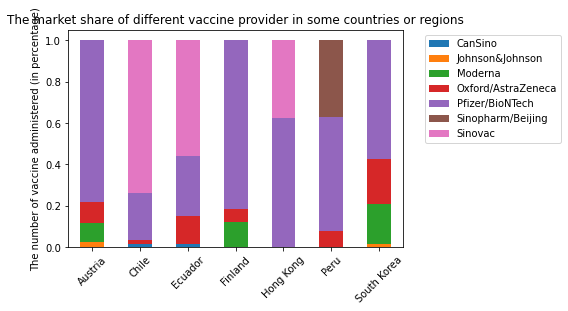

In [38]:
covid_other2=pd.crosstab(index=covid_other['location'],columns=covid_other['vaccine'],values=covid_other['total_vaccinations'],aggfunc=np.sum)

other_sec=covid_other2.div(covid_other2.sum(axis=1),axis=0)

other_sec.plot.bar(stacked=True)
plt.xlabel(None)
plt.ylabel('The number of vaccine administered (in percentage)')
plt.title('The market share of different vaccine provider in some countries or regions')
plt.legend(loc=2,bbox_to_anchor=(1.05,1),borderaxespad=0.5)
plt.xticks(rotation=45)

plt.show()

In some other countries or regions, Pfizer loses the dominant position in the market.

## Data source
https://www.kff.org/coronavirus-covid-19/issue-brief/latest-data-on-covid-19-vaccinations-by-race-ethnicity/

The following visuals represent the vaccination penetration (at least one dose) within the U.S. amongst the racial background of its population. 

The data is provided by the Non Profit Organization “KFF”, which in turn gathered the primary data from the CDC.

The .png file (Figure 2) from the above mentioned source (url link provided above) was taken, translated into an Excel table, and cleaned (i.e., as in taking out all the states except the ones necessary for analysis). Afterwards, the Excel table was converted into a .csv file ready to be imported.

In [16]:
vac = pd.read_csv('vac.csv')
df = pd.read_csv('vac.csv')
df.head()

,State,White,Black,Hispanic,Asian
0,California,73,64,62,87
1,New York,68,66,80,99
2,Texas,53,47,61,74
3,Total (42 States),61,55,62,83


Only 42 states are included in the total due to various reasons like differences in reporting or "non-comparable bridged race categories."

### Racial Vaccination Ratio in California

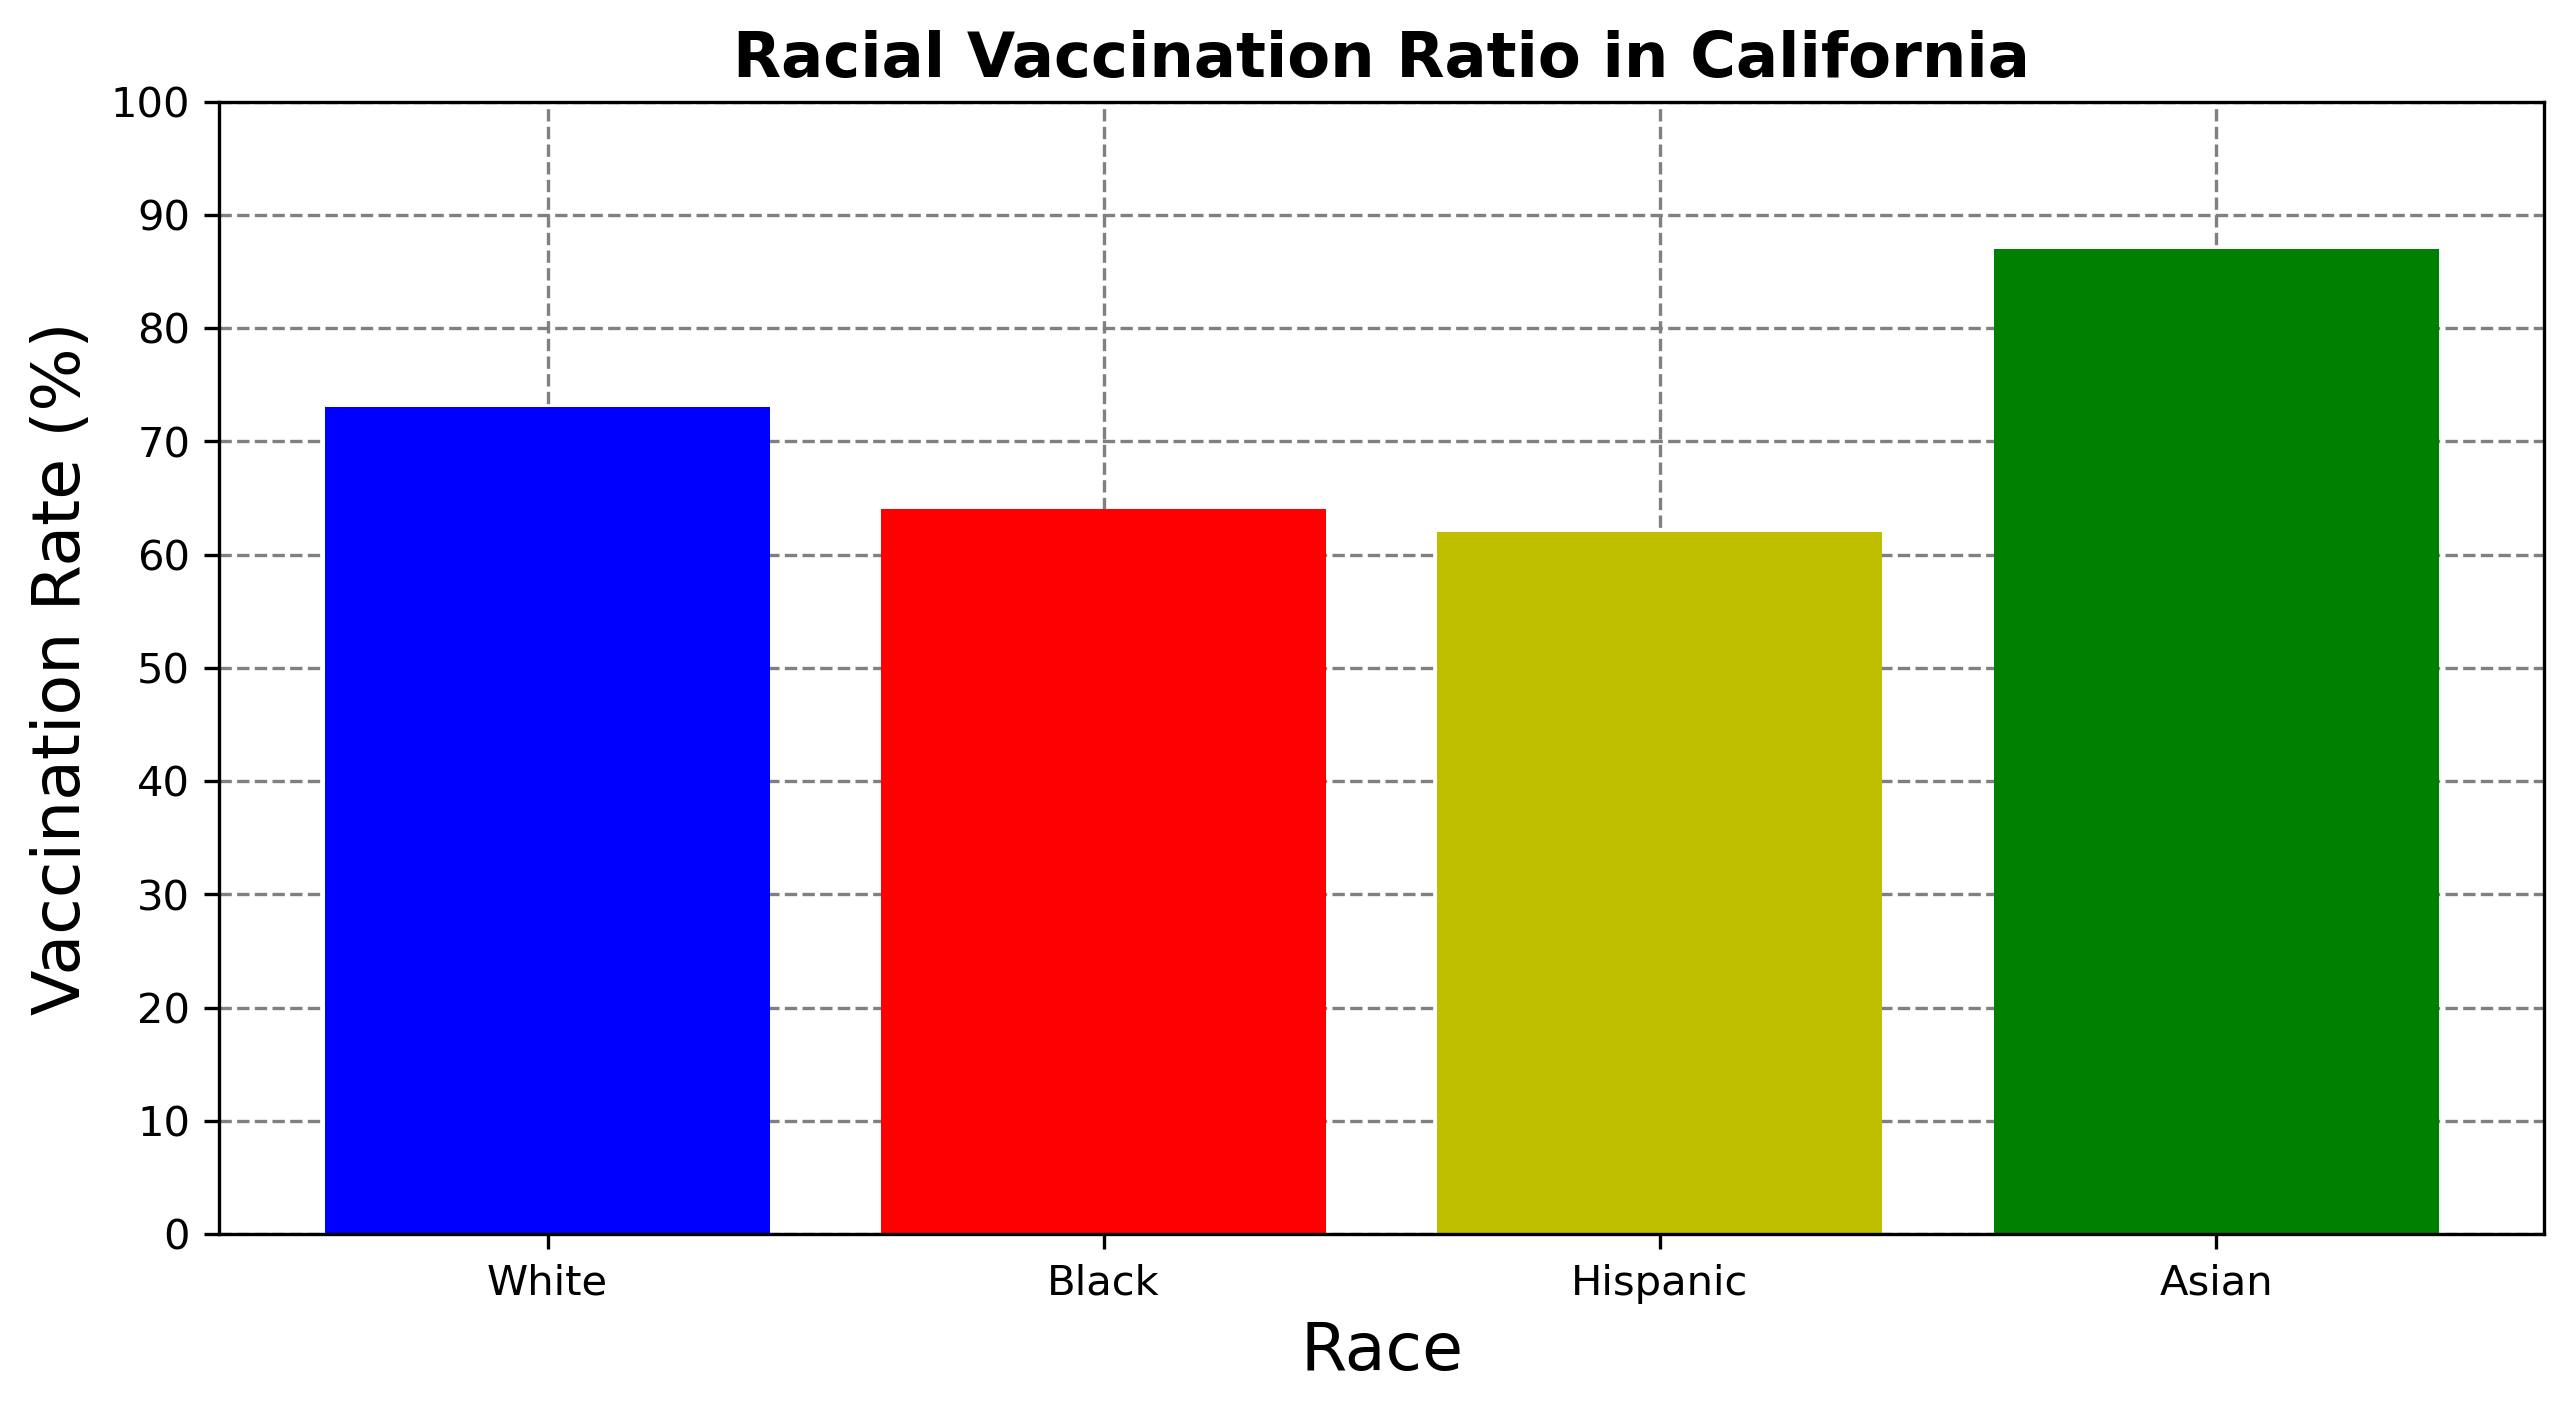

In [17]:
fig = plt.figure(figsize=(10, 5), dpi = 300)
ax = fig.add_subplot(1,1,1)

race = ['White', 'Black', 'Hispanic', "Asian"]
state = [vac.White[0], vac.Black[0], vac.Hispanic[0], vac.Asian[0]]
c = ['blue', 'r', 'y', 'g']

plt.bar(race, state, color = c)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.xlabel('Race', fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel('Vaccination Rate (%)',fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.title("Racial Vaccination Ratio in California", fontdict={'fontweight': 'heavy', 'fontsize' :15})

plt.show()

This visual is showing the total vaccination rate (at least one shot) of the population of California according to its racial subgroups (White, Black, Hispanic and Asian).

### Racial Vaccination Ratio in New York

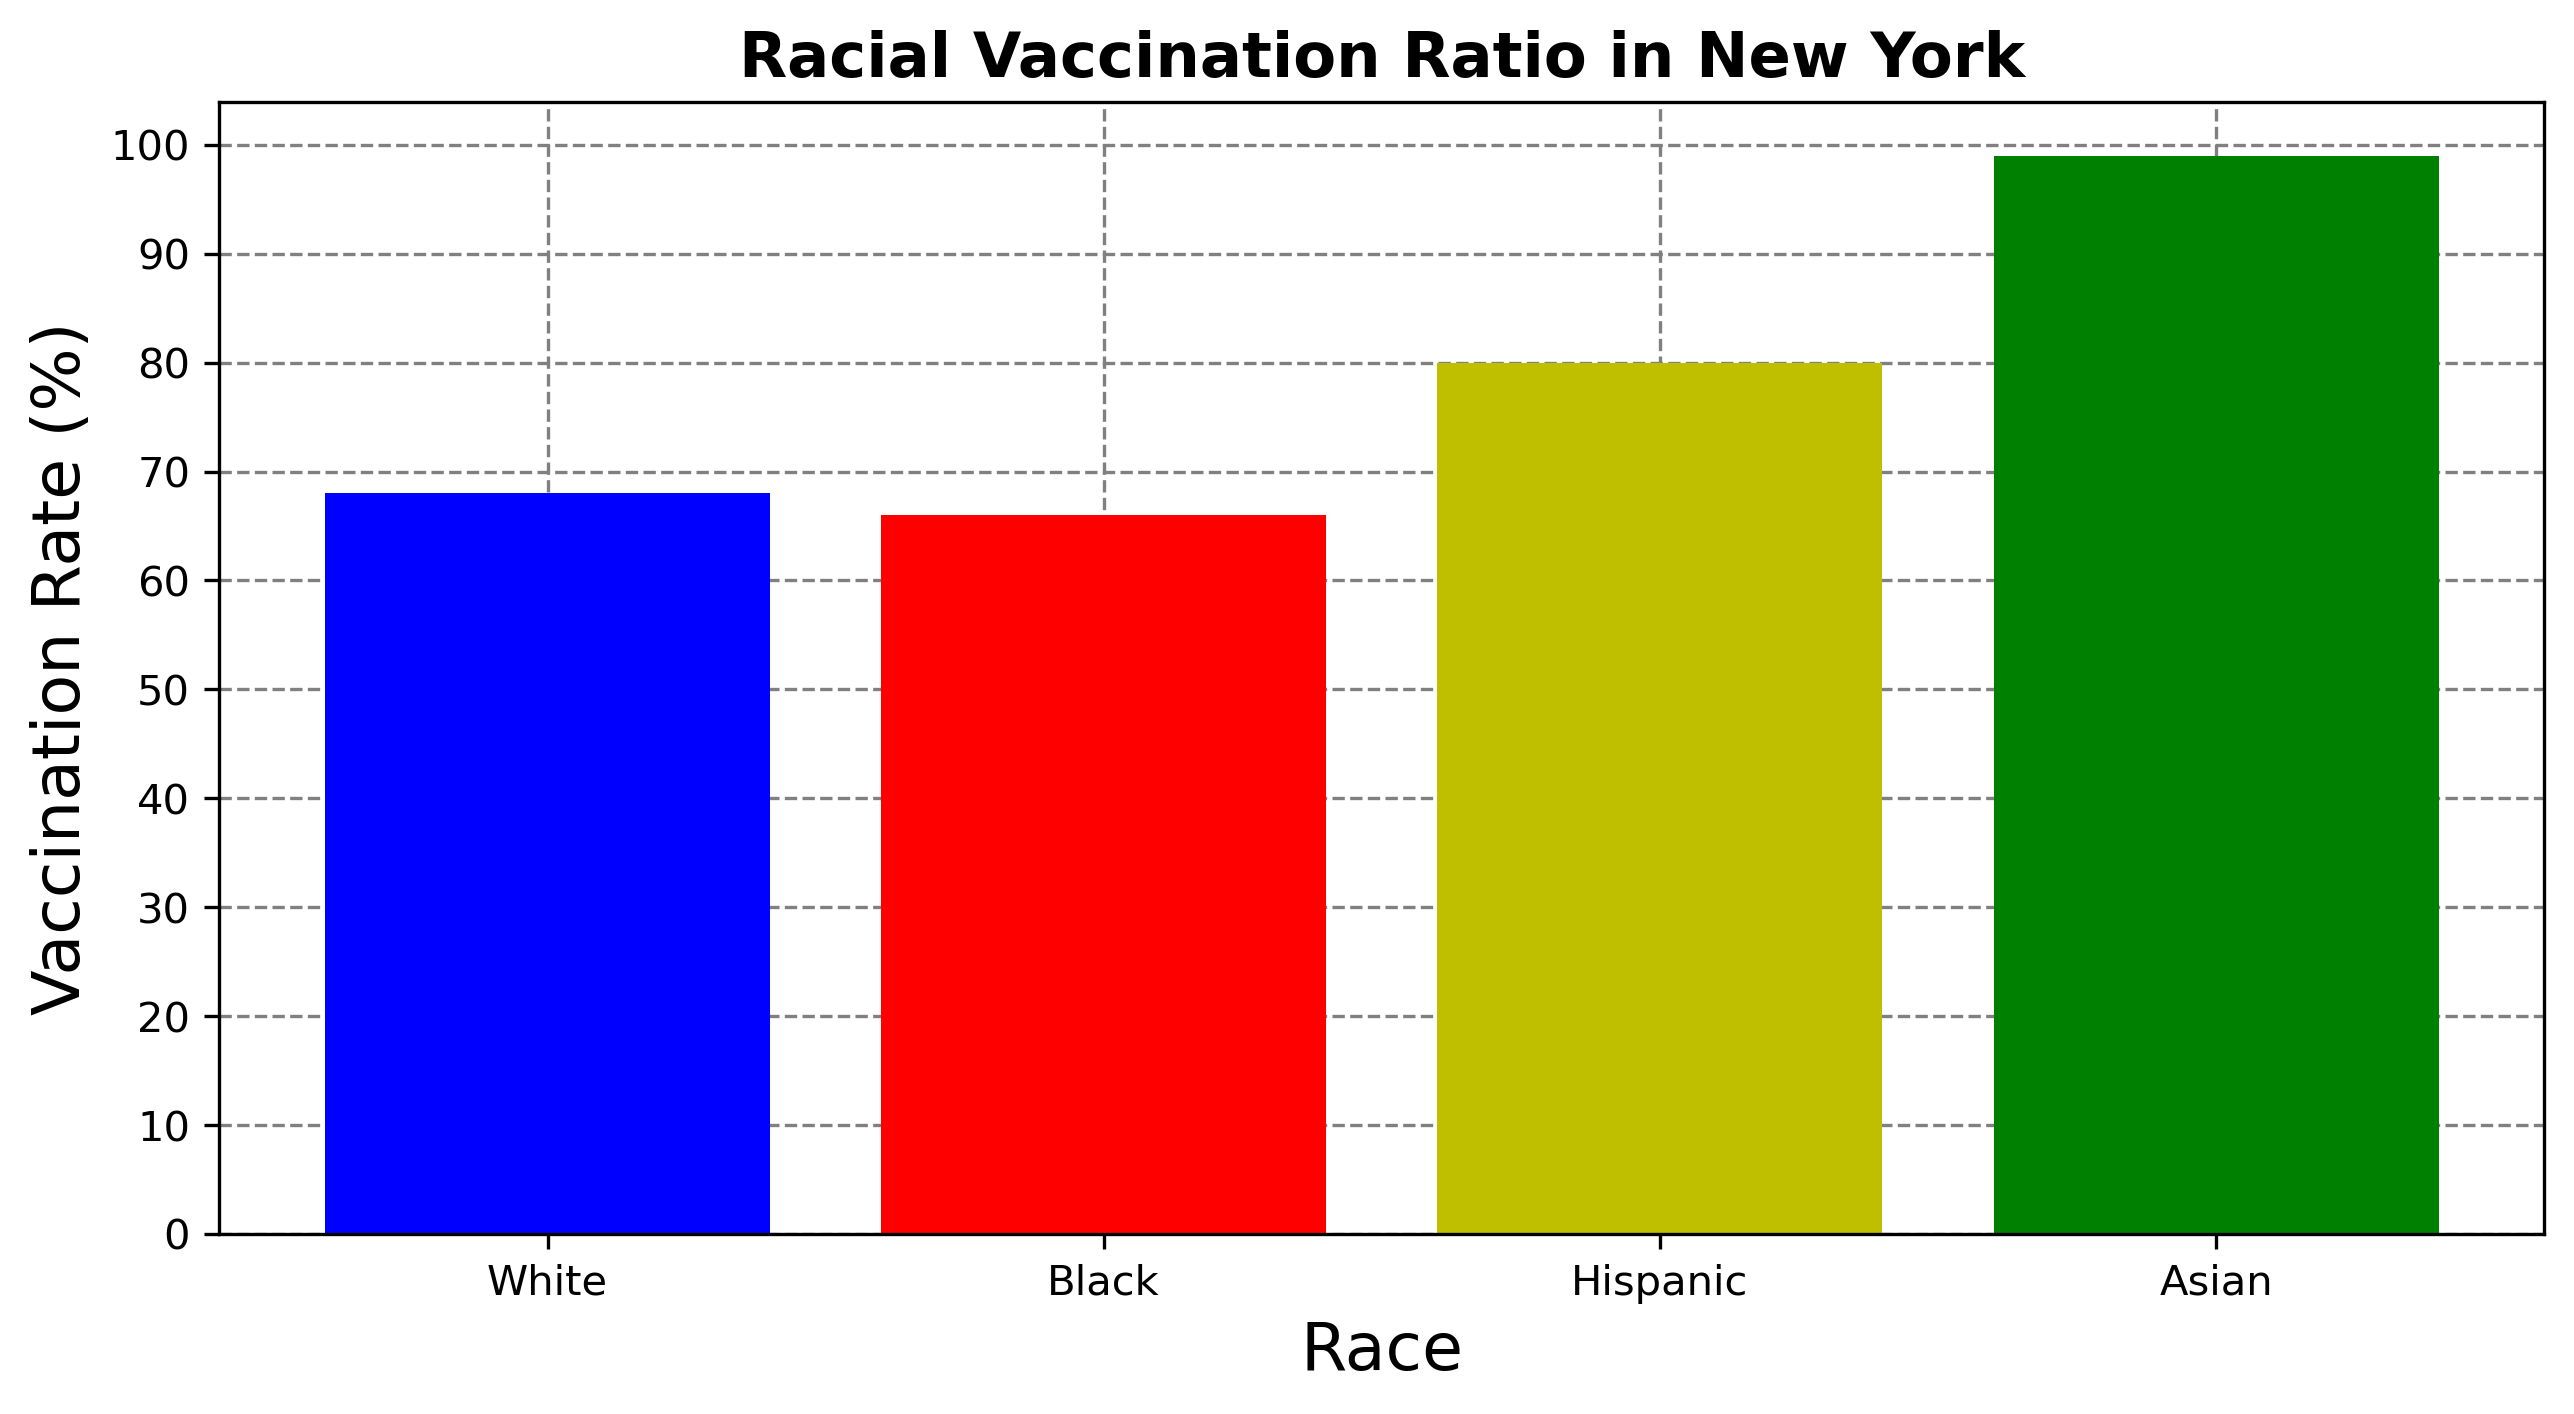

In [18]:
fig = plt.figure(figsize=(10, 5), dpi = 300)
ax = fig.add_subplot(1,1,1)

race = ['White', 'Black', 'Hispanic', "Asian"]
state = [vac.White[1], vac.Black[1], vac.Hispanic[1], vac.Asian[1]]
c = ['blue', 'r', 'y', 'g']

plt.bar(race, state, color = c)

plt.xlabel('Race', fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel('Vaccination Rate (%)',fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.title("Racial Vaccination Ratio in New York", fontdict={'fontweight': 'heavy', 'fontsize' :15})

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.show()

This visual is showing the total vaccination rate (at least one shot) of the population of New York according to its racial subgroups (White, Black, Hispanic and Asian).

### Racial Vaccination Ratio in Texas

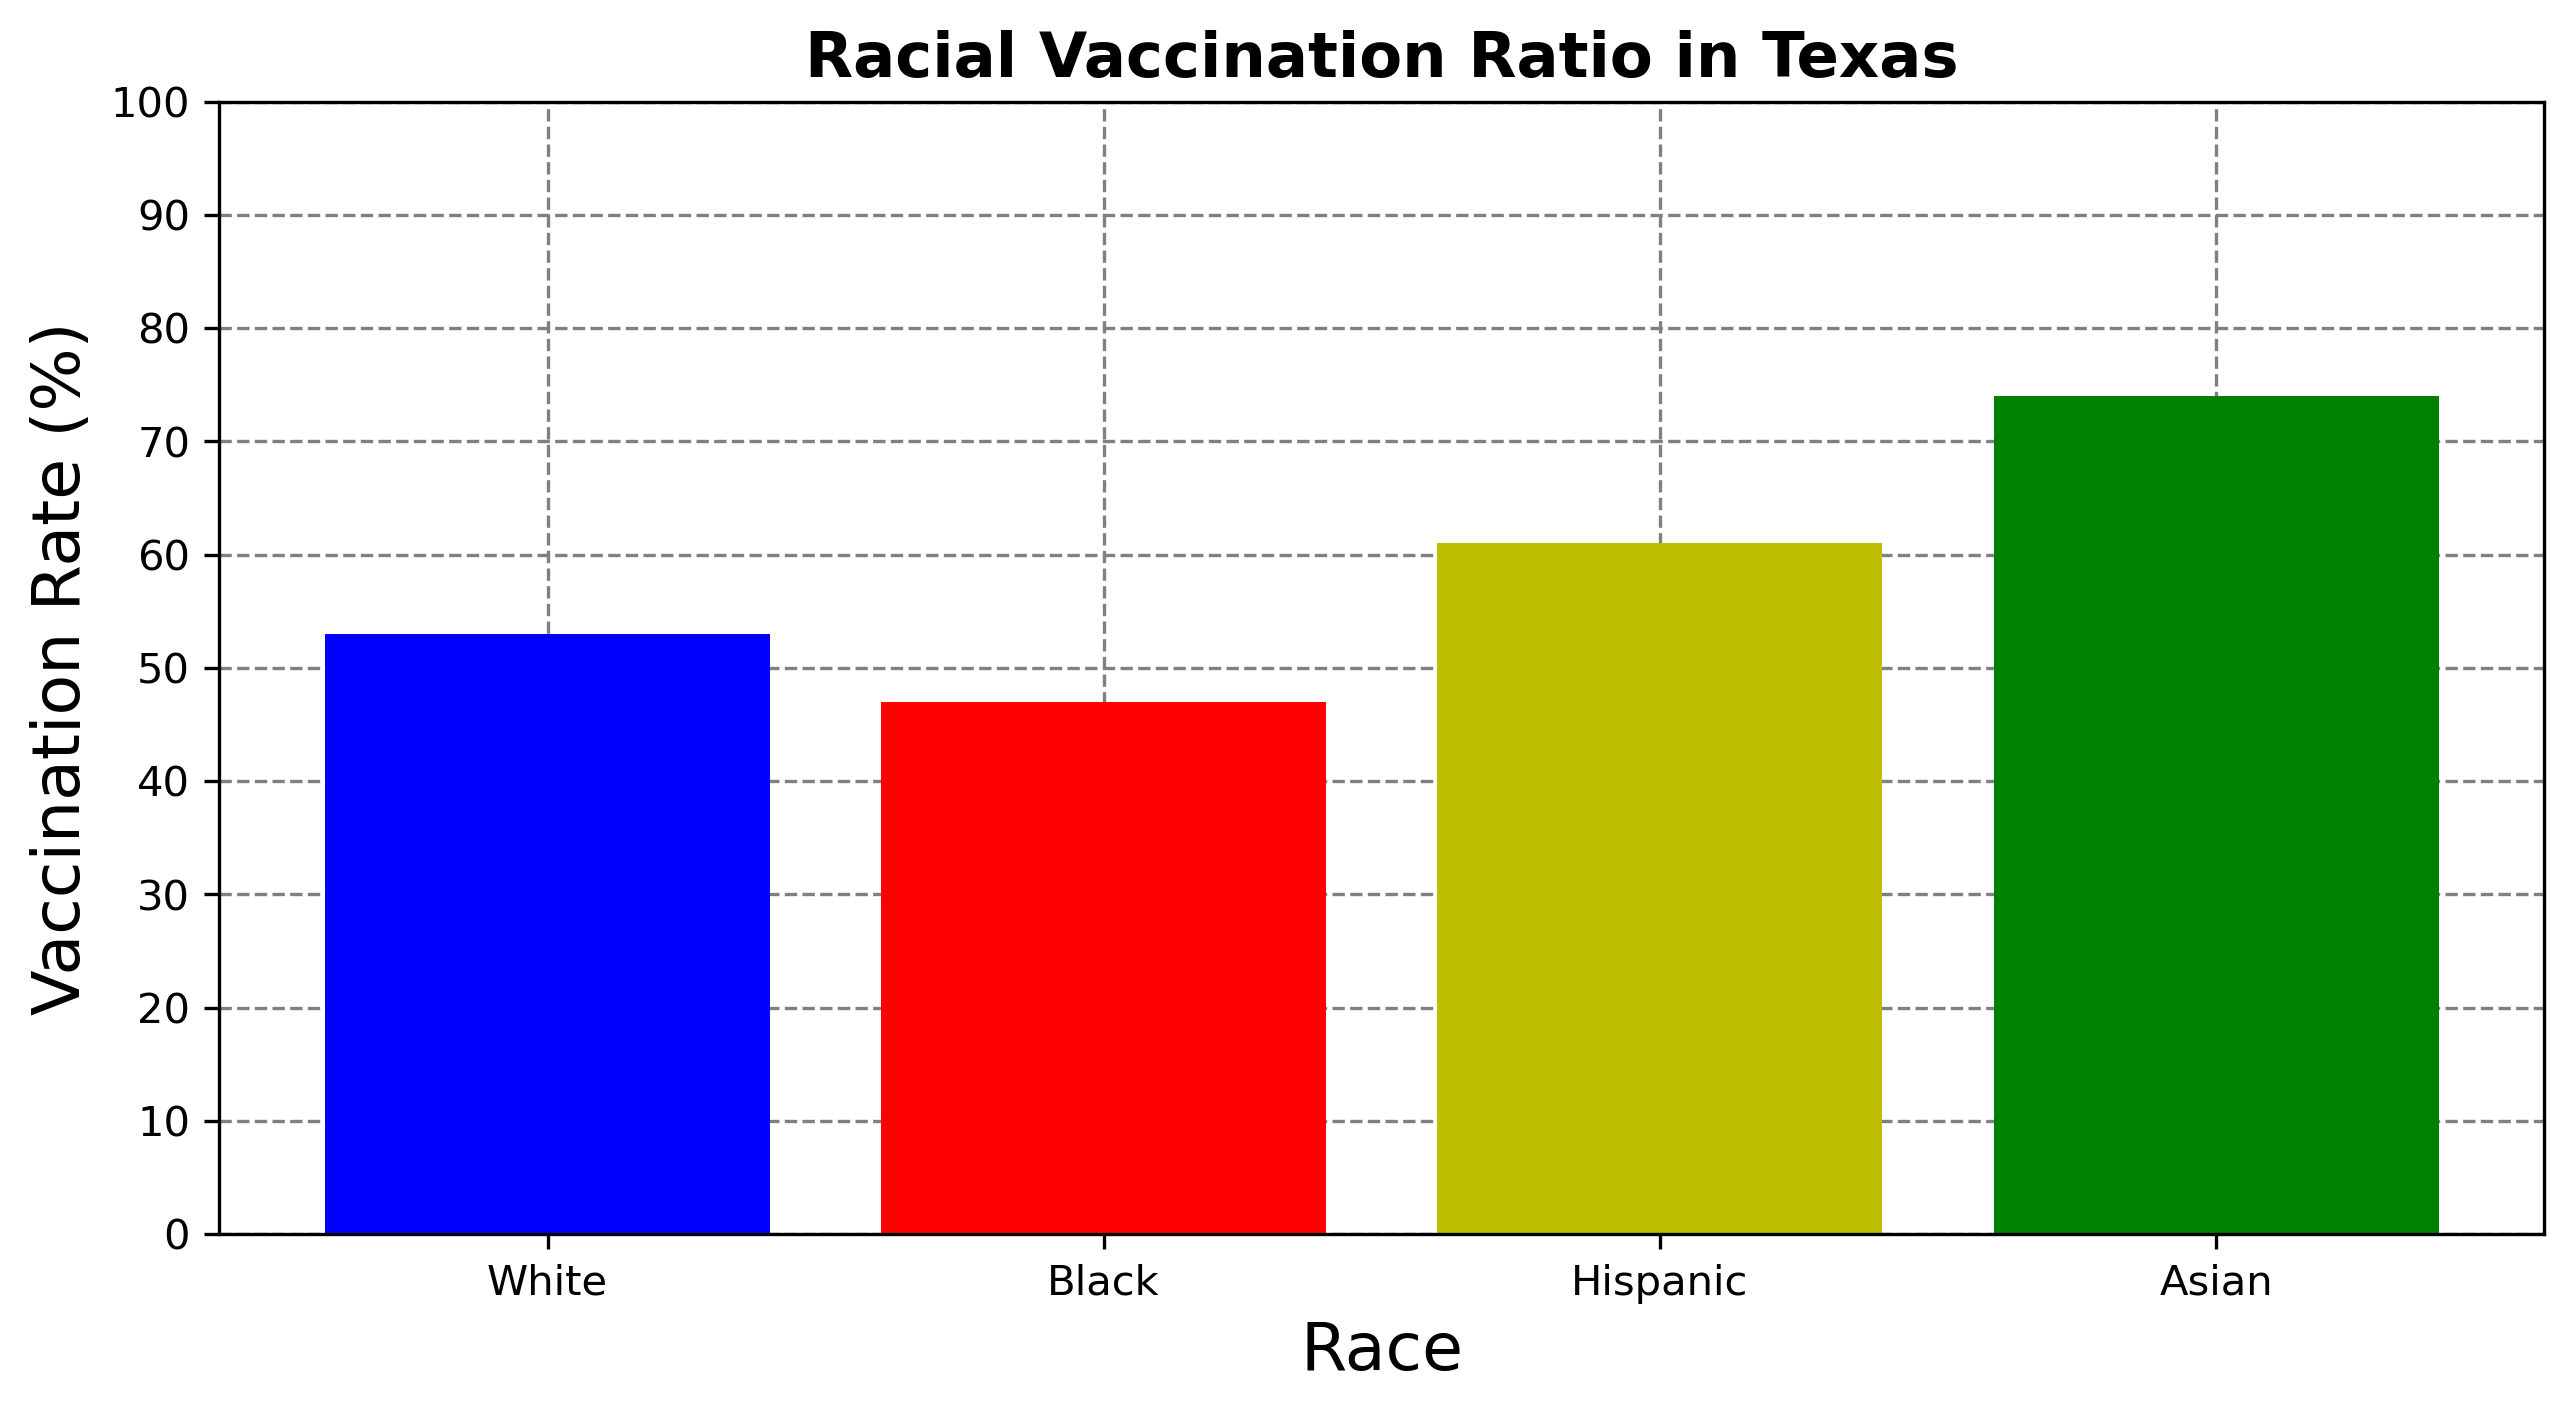

In [19]:
fig = plt.figure(figsize=(10, 5), dpi = 300)
ax = fig.add_subplot(1,1,1)

race = ['White', 'Black', 'Hispanic', "Asian"]
state = [vac.White[2], vac.Black[2], vac.Hispanic[2], vac.Asian[2]]
c = ['blue', 'r', 'y', 'g']

plt.bar(race, state, color = c)

plt.xlabel('Race', fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel('Vaccination Rate (%)',fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.title("Racial Vaccination Ratio in Texas", fontdict={'fontweight': 'heavy', 'fontsize' :15})

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.show()

This visual is showing the total vaccination rate (at least one shot) of the population of Texas according to its racial subgroups (White, Black, Hispanic and Asian).

### Racial Vaccination Ratio in the U.S.

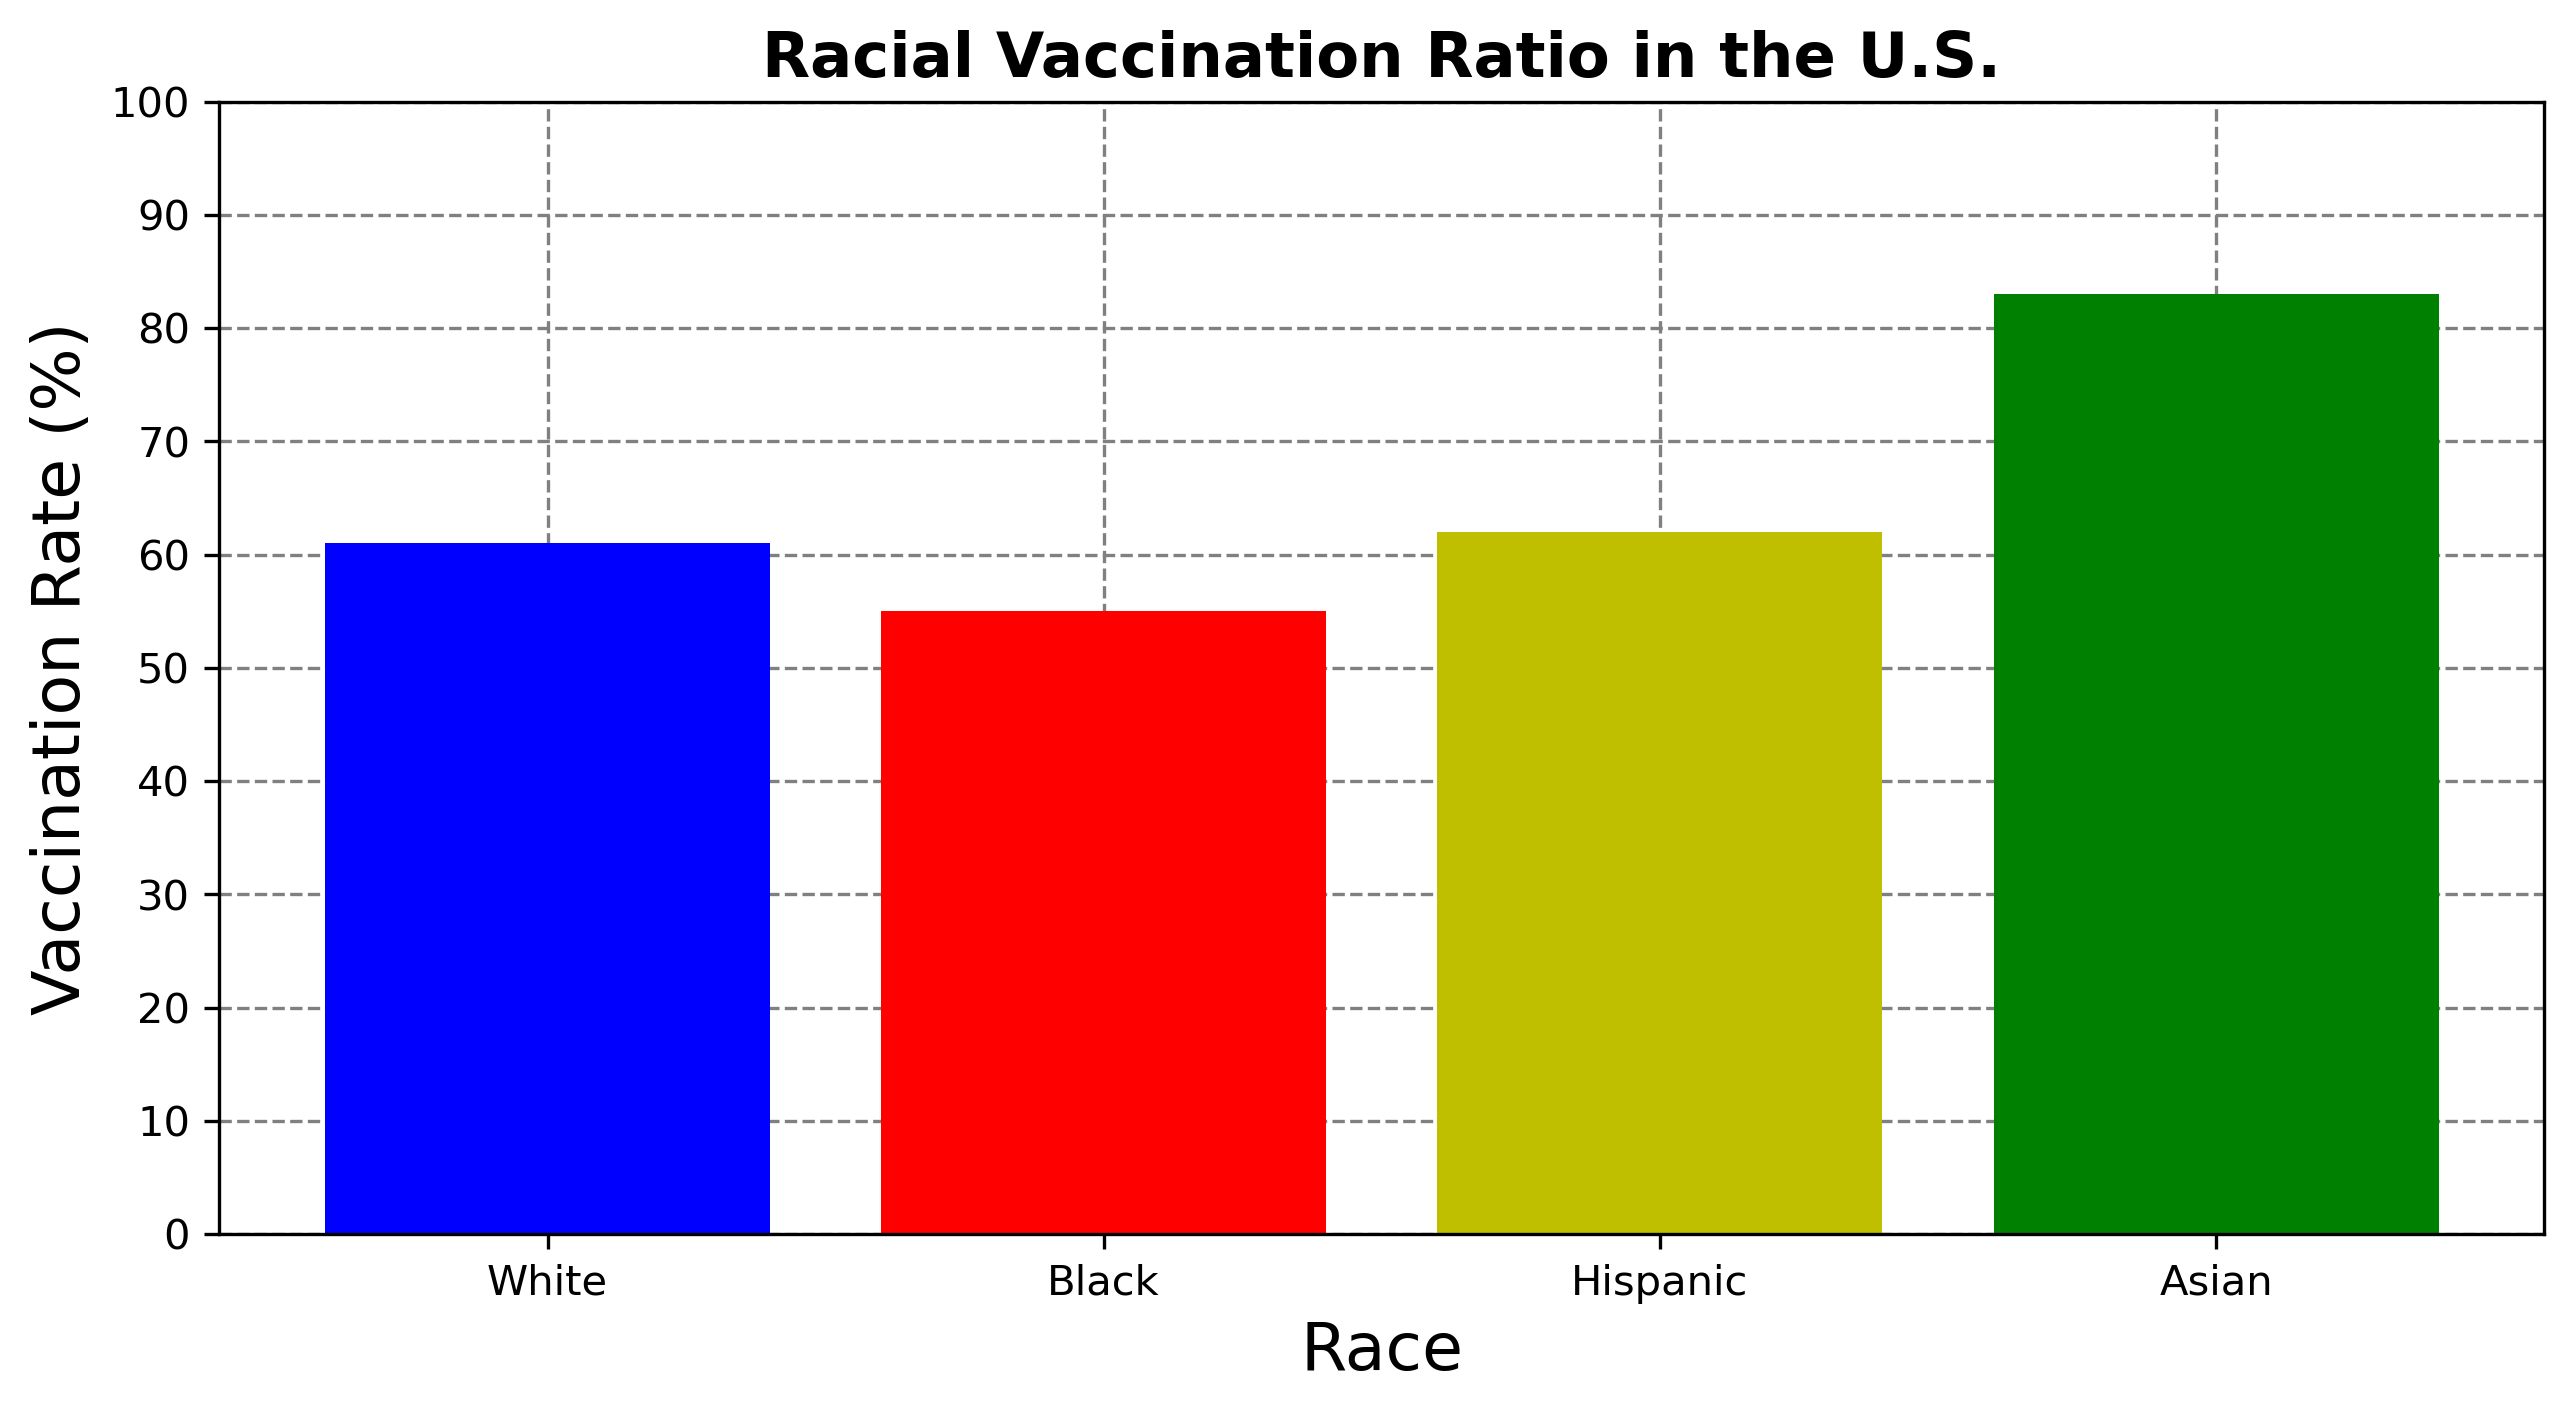

In [20]:
fig = plt.figure(figsize=(10, 5), dpi = 300)
ax = fig.add_subplot(1,1,1)


race = ['White', 'Black', 'Hispanic', "Asian"]
state = [vac.White[3], vac.Black[3], vac.Hispanic[3], vac.Asian[3]]
c = ['blue', 'r', 'y', 'g']

plt.bar(race, state, color = c)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.xlabel('Race', fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylabel('Vaccination Rate (%)',fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.title("Racial Vaccination Ratio in the U.S.", fontdict={'fontweight': 'heavy', 'fontsize' :15})

plt.show()

This visual is showing the total vaccination rate (at least one shot) of the population of the US (total of 42 states) according to its racial subgroups (White, Black, Hispanic & Asian).

### Racial Vaccination Ratio in the U.S. - Total Comparison

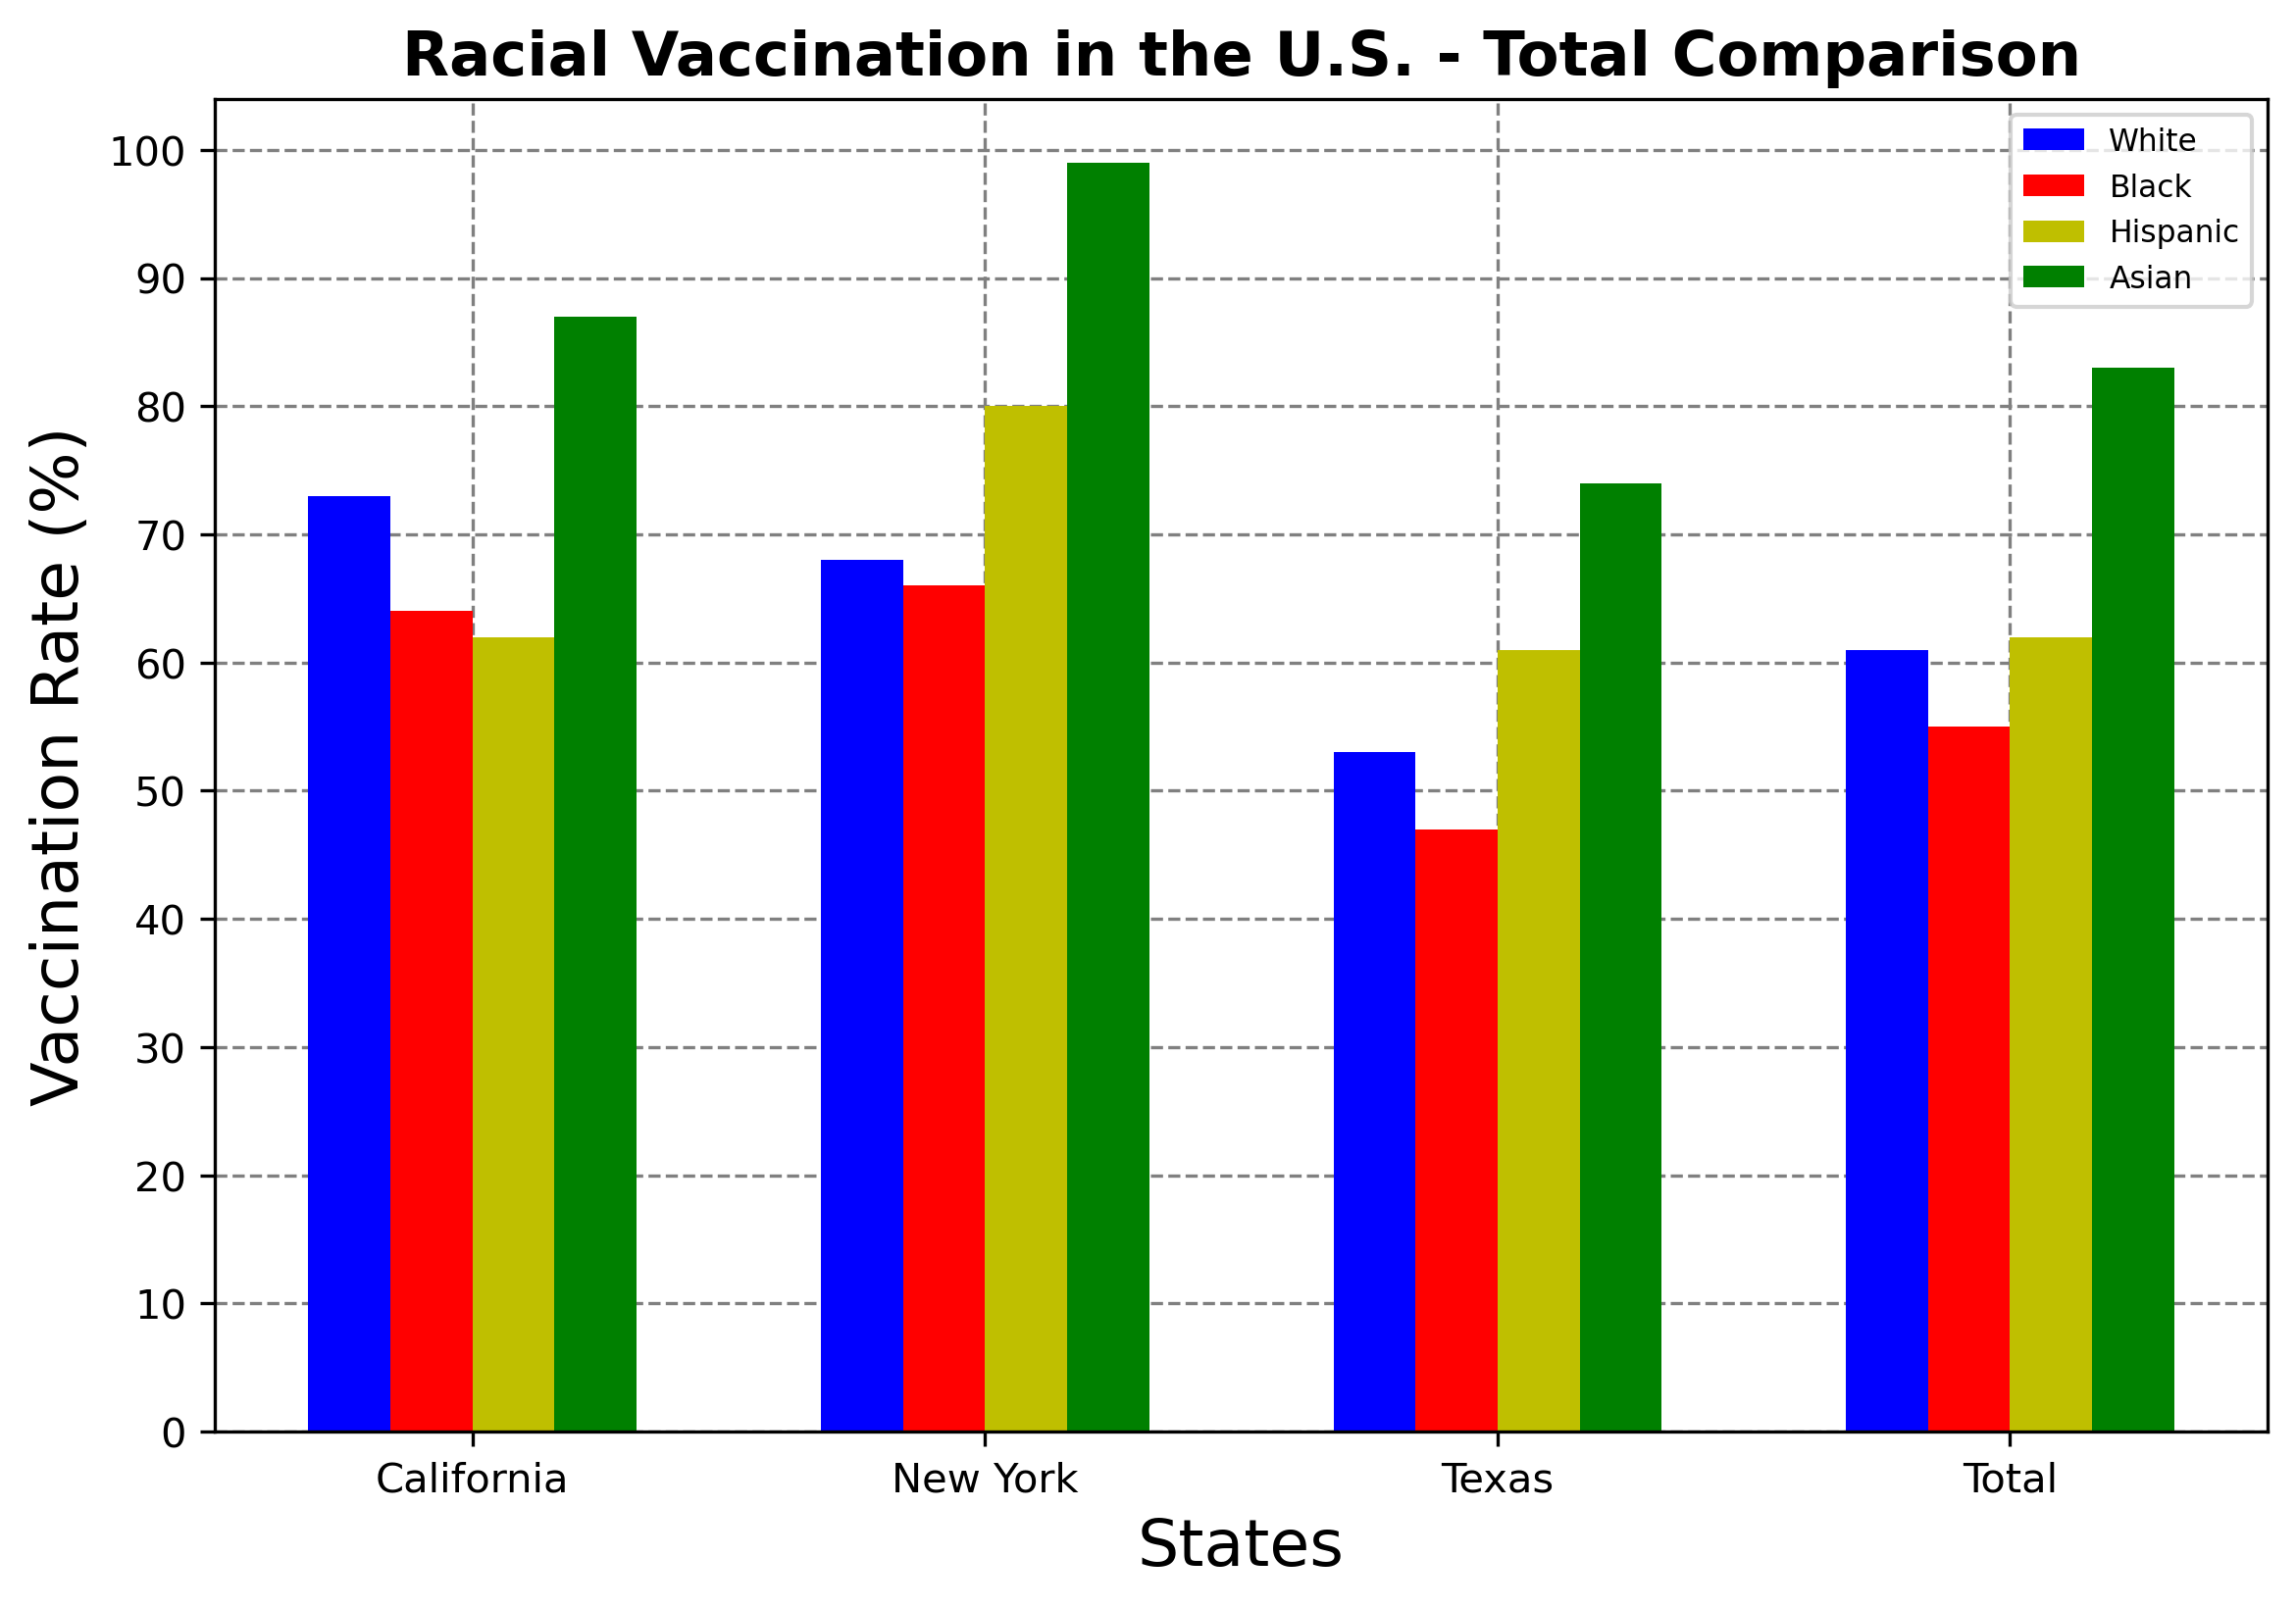

In [21]:
fig = plt.figure(figsize=(9, 6), dpi = 300)
ax = fig.add_subplot(1,1,1)

states = ['California', 'New York', 'Texas', "Total"]
width = 0.15

AWhite = [vac.White[0], vac.White[1], vac.White[2], vac.White[3]]
BBlack = [vac.Black[0], vac.Black[1], vac.Black[2], vac.Black[3]]
YHis = [vac.Hispanic[0], vac.Hispanic[1], vac.Hispanic[2], vac.Hispanic[3]]
ZAsian = [vac.Asian[0], vac.Asian[1], vac.Asian[2], vac.Asian[3]]

states_axis = np.arange(len(states))

plt.bar(states_axis - 0.24, AWhite, 0.16, label = 'White', color = 'b')
plt.bar(states_axis - 0.08, BBlack, 0.16, label = 'Black', color = 'r')
plt.bar(states_axis + 0.08, YHis, 0.16, label = 'Hispanic', color = 'y')
plt.bar(states_axis + 0.24, ZAsian, 0.16, label = 'Asian', color = 'g')

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

plt.xticks(states_axis, states)
plt.xlabel('States', fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.ylabel('Vaccination Rate (%)',fontdict={'fontweight': 'normal', 'fontsize' :16})
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title("Racial Vaccination in the U.S. - Total Comparison", fontdict={'fontweight': 'heavy', 'fontsize' :15})
plt.legend(loc= "upper right", prop={'size': 7.5})
plt.show()

This visual is showing a thorough comparison of the total vaccination rate (at least one shot) of the population of the most three most populous US states as well as the US in total (out of 42 states) according to the racial subgroups (White, Black, Hispanic & Asian).

It seems that although there are racial differences in regards to vaccination penetration throughout the U.S., it can be inferred that the overall vaccination rate (at least one dose) of the U.S. population is well above 50%.

## Data source
https://github.com/owid/covid-19-data/tree/master/public/data (accessed from https://ourworldindata.org/covid-vaccinations)

The following visuals were created from the dataset retrieved from the above link. This dataset is openly available and is updated daily. The most recent official numbers from governments and health ministries worldwide are included in this dataset.

### Vaccinations administered by quarter across continents

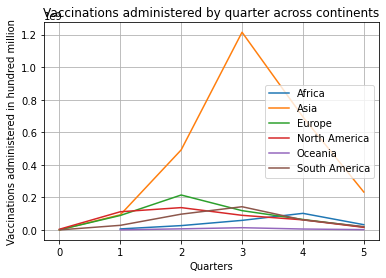

In [22]:
vax = pd.read_csv('owid-covid-data-continents.csv')

vax.plot()
plt.title("Vaccinations administered by quarter across continents")
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

# Add a legend
plt.legend(['Africa', 'Asia','Europe', 'North America', 'Oceania', 'South America'], loc=7)
ax = plt.gca()
ax.grid(True)

Asia had the largest number of vaccinations administered. Europe and North America administered most vaccines in 2021 Q1 and 2021 Q2 whereas Africa and South America administered majority of vaccinations in 2021 Q4.

### Vaccinations in Africa by quarter

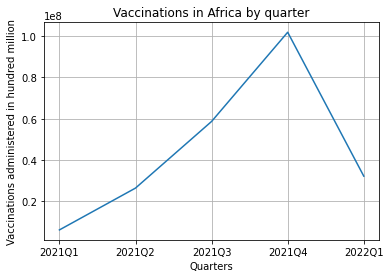

In [23]:
sns.lineplot(x='Date', y='Africa' , data=vax)
plt.title("Vaccinations in Africa by quarter")

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

ax = plt.gca()
ax.grid(True)

Vaccinations administered in Africa were highest in 2021 Q4.

### Vaccinations in Asia by quarter

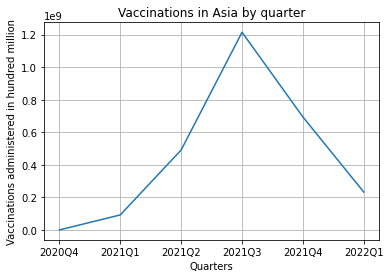

In [24]:
sns.lineplot(x='Date', y='Asia' , data=vax)
plt.title("Vaccinations in Asia by quarter")

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

ax = plt.gca()
ax.grid(True)

Vaccinations administered in Asia were highest in 2021 Q3.

### Vaccinations in Europe by quarter

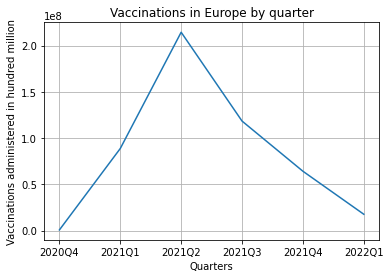

In [25]:
sns.lineplot(x='Date', y='Europe' , data=vax)
plt.title("Vaccinations in Europe by quarter")

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

ax = plt.gca()
ax.grid(True)

Vaccinations administered in Europe were highest in 2021 Q2.

### Vaccinations in North America by quarter

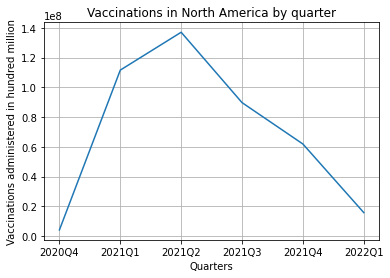

In [26]:
sns.lineplot(x='Date', y='North America' , data=vax)
plt.title("Vaccinations in North America by quarter")

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

ax = plt.gca()
ax.grid(True)

Vaccinations administered in North America were highest in 2021 Q2.

### Vaccinations in South America by quarter

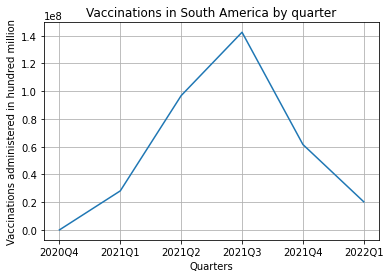

In [27]:
sns.lineplot(x='Date', y='South America' , data=vax)
plt.title("Vaccinations in South America by quarter")

plt.xlabel("Quarters")
plt.ylabel("Vaccinations administered in hundred million")

ax = plt.gca()
ax.grid(True)

Vaccinations administered in South America were highest in 2021 Q3.

# Part 4: Conclusion

## Data sources

https://github.com/owid/covid-19-data 

https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/d6p8-wqjm

The data for the visuals below have been obtained from the links above. The datasets contains information on COVID-19 like total number of cases, deaths country wise and continent wise, vaccinated age-groups, un-vaccinated age-groups, etc. as of February 18th, 2022.

### Comparison of death rate 18-49 age group

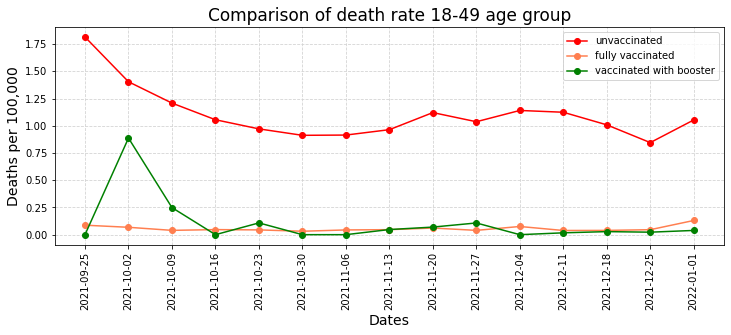

In [28]:
y=pd.read_csv('united-states-rates-of-covid-19-deaths-by-vaccination-status.csv')
y.head()
df = y.loc[y['Entity']== "18-49"]
fig, ax = plt.subplots()
ax.plot(df["Day"], df["unvaccinated"],marker='o',label='unvaccinated',color='red')
ax.plot(df["Day"], df["fully_vaccinated"],marker='o',label='fully vaccinated',color='coral')
ax.plot(df["Day"], df["boosted"],marker='o',label='vaccinated with booster',color='green')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Deaths per 100,000', fontsize=14)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.legend(fontsize=10) # using a size in points

ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle='dashed')
ax.set_title('Comparison of death rate 18-49 age group', fontsize=17)


plt.show()

The number of deaths is significantly higher for the unvaccinated in age group 18-49.

### Comparison of death rate 50-64 age group

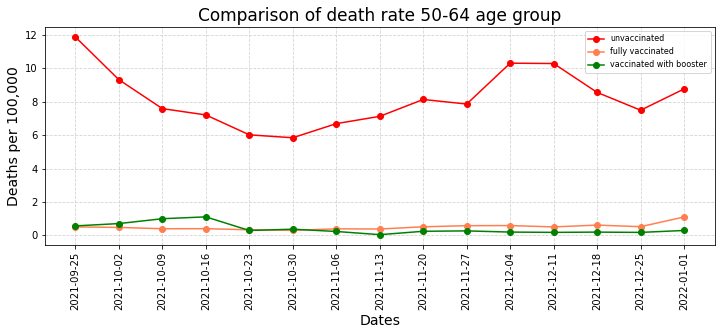

In [29]:
y=pd.read_csv('united-states-rates-of-covid-19-deaths-by-vaccination-status.csv')
y.head()
df = y.loc[y['Entity']== "50-64"]
fig, ax = plt.subplots()
ax.plot(df["Day"], df["unvaccinated"],marker='o',label='unvaccinated',color='red')
ax.plot(df["Day"], df["fully_vaccinated"],marker='o',label='fully vaccinated',color='coral')
ax.plot(df["Day"], df["boosted"],marker='o',label='vaccinated with booster',color='green')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Deaths per 100,000', fontsize=14)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])
plt.legend(fontsize=8) # using a size in points

ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle='dashed')
ax.set_title('Comparison of death rate 50-64 age group', fontsize=17)


plt.show()

The number of deaths is significantly higher for the unvaccinated in age group 50-64. The lowest death rate is observed in the vaccinated with booster category.

### Comparison of death rate 65+ age group

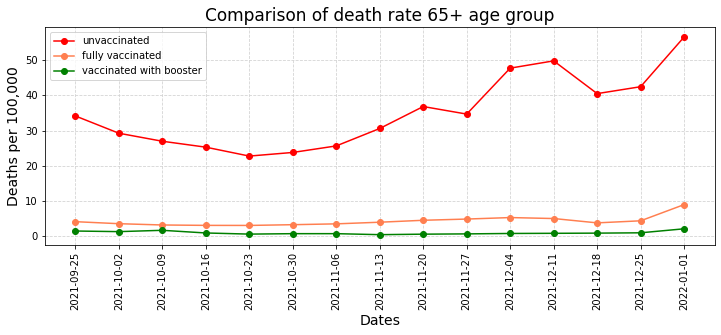

In [30]:
y=pd.read_csv('united-states-rates-of-covid-19-deaths-by-vaccination-status.csv')
df = y.loc[y['Entity']== "65+"]
fig, ax = plt.subplots()
ax.plot(df["Day"], df["unvaccinated"],marker='o',label='unvaccinated',color='red')
ax.plot(df["Day"], df["fully_vaccinated"],marker='o',label='fully vaccinated',color='coral')
ax.plot(df["Day"], df["boosted"],marker='o',label='vaccinated with booster',color='green')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Deaths per 100,000', fontsize=14)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])
ax.legend()
ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle='dashed')
ax.set_title('Comparison of death rate 65+ age group', fontsize=17)


plt.show()

The number of deaths is significantly higher for the unvaccinated in age group 65+. The lowest death rate is observed in the vaccinated with booster category.

### Comparison of death rate all age groups

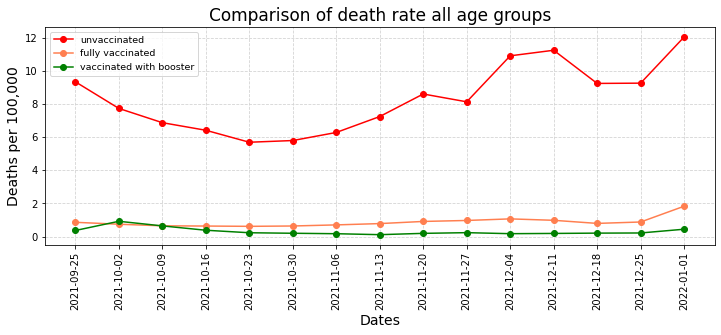

In [31]:
x=pd.read_csv('united-states-rates-of-covid-19-deaths-by-vaccination-status.csv')
df = x.loc[x['Entity']== "All ages"]
fig, ax = plt.subplots()
ax.plot(df["Day"], df["unvaccinated"],marker='o',label='unvaccinated',color='red')
ax.plot(df["Day"], df["fully_vaccinated"],marker='o',label='fully vaccinated',color='coral')
ax.plot(df["Day"], df["boosted"],marker='o',label='vaccinated with booster',color='green')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Deaths per 100,000', fontsize=14)
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, p: format(int(y), ','))) # x-axis thousands separator
fig.set_size_inches([12, 4])
plt.legend(fontsize=9.5) # using a size in points
ax.set_axisbelow(True)
ax.grid(color='lightgray', linestyle='dashed')
ax.set_title('Comparison of death rate all age groups', fontsize=17)


plt.show()

The analysis is very clear. For all age groups, the number of people dying is highest in the unvaccinated category. The fully vaccinated (2 doses) have a much lower death rate, while fully vaccinated plus booster have the lowest death rate.  